In [1]:
import numpy as np
import adi
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
sdr = adi.Pluto()
sdr.rx_lo = int(2.4405e9)
sdr.rx_rf_bandwidth = int(56e6)
sdr.sample_rate = int(40e6)
sdr.rx_buffer_size = 1024

In [36]:
sdr

Pluto(uri="") object "PlutoSDR" with following key properties:

rx_lo:                   2440.5       MHz, Carrier frequency of RX path
rx_hardwaregain_chan0    53           dB, Gain applied to RX path. Only applicable when gain_control_mode is set to 'manual'
rx_rf_bandwidth:         56.0         MHz, Bandwidth of front-end analog filter of RX path
gain_control_mode_chan0: slow_attack  Receive path AGC Options: slow_attack, fast_attack, manual

tx_lo:                   2450.0       MHz, Carrier frequency of TX path
tx_hardwaregain_chan0:   -10          dB, Attenuation applied to TX path
tx_rf_bandwidth:         18.0         MHz, Bandwidth of front-end analog filter of TX path
tx_cyclic_buffer:        0            Toggles cyclic buffer

filter:                  [128.0, 2.0, 128.0, 2.0] FIR filter file
sample_rate:             40.0         MSPS, Sample rate RX and TX paths
loopback:                0            0=Disabled, 1=Digital, 2=RF


In [37]:
print("RX Buffer Size", sdr.rx_buffer_size)
print("RX Gain", sdr.rx_hardwaregain_chan0)
print("TX Gain", sdr.tx_hardwaregain_chan0)

RX Buffer Size 1024
RX Gain 30
TX Gain -10


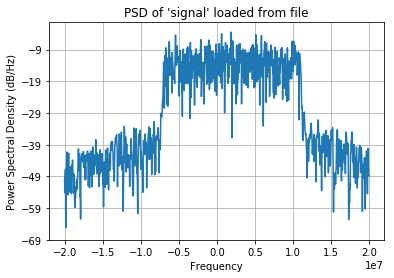

In [38]:
plt.psd(sdr.rx(), NFFT=1024, Fs=sdr.sample_rate)
plt.title("PSD of 'signal' loaded from file")
plt.show() 

In [6]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline

def live_plot(data, figsize=(7,5), title='', freq=False, freqlabels=None):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
#     plt.plot(data)
    if freq:
        for label,data in data.items():
            plt.plot(freqlabels, data, label=label)
    else:  
        for label,data in data.items():
            plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.legend(loc='center left') # the plot evolves to the right
    plt.xlabel('samples')
    plt.show();

In [ ]:
timeData = dict()
for i in range(10):
    samples = sdr.rx()
    timeData['I'] = np.real(samples)
    timeData['Q'] = np.imag(samples)
    live_plot(timeData, title='Time Plot')

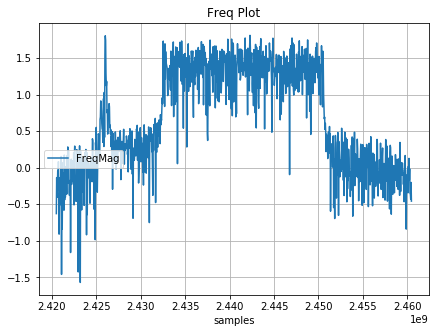

In [53]:
freqData = dict()
for i in range(1):
    samples = sdr.rx()
    fft = np.fft.fftshift(np.fft.fft(samples)) / sdr.rx_buffer_size
    xlabels = np.fft.fftshift(np.fft.fftfreq(sdr.rx_buffer_size, 1/sdr.sample_rate)) + sdr.rx_lo
    fft_mag = np.log10(np.abs(fft))
    freqData['FreqMag'] = fft_mag
    live_plot(freqData, title='Freq Plot', freq=True, freqlabels=xlabels)

In [ ]:
np.arange(-sdr.sample_rate//2,sdr.sample_rate//2)